banner id:          904128828


verification code:  85764d63032f

# Test 2b - Merge, Aggregate, Visualize

## Introduction

This problem tests your ability to merge, aggregate, and visualize data.
You'll work with realistic business data to answer questions about product profitability.

Before submitting, ensure your notebook:

- Includes your verification info (Banner ID and code) as the first cell
- Runs completely with "Kernel → Restart & Run All"
- Shows your work (don't just print final answers)
- Includes your interpretation responses at the end

## Dataset: Bean & Brew Coffee Shop

You've been hired to analyze sales data for Bean & Brew, a local coffee shop chain with three locations. The owner wants to understand which products are most profitable and how profitability varies across locations.

There are two data files:

- `sales.csv` - Individual transaction records
  - `transaction_id`: Unique transaction identifier
  - `timestamp`: Date and time of purchase (format: 'YYYY-MM-DD HH:MM:SS')
  - `location`: Store location ('Downtown', 'Campus', 'Suburb')
  - `product_id`: Product identifier (links to products table)
  - `quantity`: Number of units sold
  - `revenue`: Total revenue from transaction
  - `payment_method`: Payment type ('Cash', 'Credit', 'Mobile')
  - `loyalty_member`: Boolean indicating if customer is loyalty program member
- `products.csv` - Product catalog
  - `product_id`: Unique product identifier
  - `name`: Product name
  - `category`: Product category ('Coffee', 'Tea', 'Pastry', 'Sandwich')
  - `cost`: Cost to make/acquire one unit (for profit calculation)

The dataset contains two weeks of sales data (approximately 3,000 transactions) across 18 products. It includes both regular and premium items in each category.

We are interested in learning which product categories generate the most profit, and how does profitability vary across locations? Complete the following tasks to answer those questions and more.

## Scoring

Total: 30 points (+ 5 bonus)

- Tasks 1-6: 18 points
- Interpretation (Questions 1-4): 12 points
- Bonus: 5 points (optional)

## Generate Your Dataset

Before starting the analysis, you need to generate your unique dataset using your Banner ID.

1. Open a terminal in the folder containing `generate_test2b_data.py`
2. Activate your conda virtual environment
3. Run: `python generate_test2b_data.py`
4. Enter your 9-digit Banner ID when prompted (you'll enter it twice to confirm)

The script will create two files in the `data/` folder:

- `data/products.csv` - Product catalog
- `data/sales.csv` - Transaction records

Important: At the end, the script displays a verification block like this:

```
======================================================================
DATA VERIFICATION INFORMATION
======================================================================
banner id:          904123456
verification code:  5e0dXXXXXXXX
======================================================================
```

Copy the banner id and verification code lines and paste them into the cell below. This is required for submission.

```
banner id:          904128828
verification code:  85764d63032f

```

## Setup: Load the Data

Run the cell below to load the data. The code is provided for you.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data (provided)
sales = pd.read_csv('data/sales.csv', parse_dates=['timestamp'])
products = pd.read_csv('data/products.csv')

print(f"Sales: {len(sales)} transactions")
print(f"Products: {len(products)} items in catalog")
print()
print("Sales preview:")
sales.head()

Sales: 2970 transactions
Products: 18 items in catalog

Sales preview:


,transaction_id,timestamp,location,product_id,quantity,revenue,payment_method,loyalty_member
0,1002,2025-11-17 06:01:00,Campus,109,1.0,1.48,Cash,True
1,1004,2025-11-17 06:01:00,Campus,105,1.0,3.30,Cash,False
2,1001,2025-11-17 06:07:00,Campus,107,1.0,1.61,Cash,False
3,1000,2025-11-17 06:15:00,Suburb,104,1.0,2.51,Credit,True
4,1003,2025-11-17 06:36:00,Campus,107,1.0,1.51,Mobile,True


In [7]:
# Products catalog
products

,product_id,name,category,cost
0,101,Espresso,Coffee,1.2
1,102,Cappuccino,Coffee,1.8
2,103,Latte,Coffee,1.9
3,104,Americano,Coffee,1.0
4,105,Cold Brew,Coffee,1.5
5,106,Nitro Cold Brew,Coffee,2.5
6,107,Green Tea,Tea,0.8
7,108,Chai Latte,Tea,1.2
8,109,Herbal Tea,Tea,0.7
9,110,Premium Matcha,Tea,2.2


## Task 1: Data Quality Check

Investigate the sales data quality and coverage. Your code should answer the following questions:

1. How many missing values are in each column?
2. How many unique product IDs appear in the sales data? Compare this to the catalog size.
3. What is the date range (earliest and latest transaction)?

### Your Code

In [8]:
# Task 1: use isna(), nunique(), min/max on timestamp

print("Missing values:")
print(sales.isna().sum())
print()
unique_ids = sales['product_id'].nunique()
print("Unique product IDs in sales:", unique_ids)
print("Products in catalog:", len(products))
print()

earliest = sales['timestamp'].min()
latest = sales['timestamp'].max()
print("Earliest transaction:", earliest)
print("Latest transaction:", latest)

Missing values:
transaction_id    0
timestamp         0
location          0
product_id        0
quantity          4
revenue           3
payment_method    0
loyalty_member    0
dtype: int64

Unique product IDs in sales: 21
Products in catalog: 18

Earliest transaction: 2025-11-17 06:01:00
Latest transaction: 2025-11-30 21:57:00


## Task 2: Merge Sales with Products

Merge the sales and products DataFrames to add product information (name, category, cost) to each transaction.

### Your Code

In [10]:
# Task 2: use pd.merge() with appropriate join type

merged = pd.merge(sales, products, on='product_id', how='left')

merged.head(10)

,transaction_id,timestamp,location,product_id,quantity,revenue,payment_method,loyalty_member,name,category,cost
0,1002,2025-11-17 06:01:00,Campus,109,1.0,1.48,Cash,True,Herbal Tea,Tea,0.7
1,1004,2025-11-17 06:01:00,Campus,105,1.0,3.30,Cash,False,Cold Brew,Coffee,1.5
2,1001,2025-11-17 06:07:00,Campus,107,1.0,1.61,Cash,False,Green Tea,Tea,0.8
3,1000,2025-11-17 06:15:00,Suburb,104,1.0,2.51,Credit,True,Americano,Coffee,1.0
4,1003,2025-11-17 06:36:00,Campus,107,1.0,1.51,Mobile,True,Green Tea,Tea,0.8
5,1014,2025-11-17 07:03:00,Suburb,107,1.0,1.87,Mobile,False,Green Tea,Tea,0.8
6,1016,2025-11-17 07:04:00,Downtown,113,1.0,4.45,Mobile,False,Scone,Pastry,1.1
7,1007,2025-11-17 07:08:00,Downtown,101,1.0,3.51,Credit,True,Espresso,Coffee,1.2
8,1011,2025-11-17 07:09:00,Suburb,109,1.0,1.49,Cash,True,Herbal Tea,Tea,0.7
9,1006,2025-11-17 07:12:00,Campus,105,1.0,3.68,Credit,True,Cold Brew,Coffee,1.5


## Task 3: Verify the Merge

After merging, verify that the merge worked correctly:

1. Compare the shape of the merged DataFrame to the original sales data
2. Check if any rows have missing values in the product columns (name, category, cost)
3. If there are missing values, identify which product_id(s) are causing the problem

### Your Code

In [11]:
# Task 3: check shape, isna() on product columns, filter to find problem IDs

print("Original sales shape:", sales.shape)
print("Merged shape:", merged.shape)
print()
print("Missing values in product columns:")
print(merged[['name', 'category', 'cost']].isna().sum())
print()
missing_rows = merged[merged['name'].isna()]
bad_ids = missing_rows['product_id'].unique()
print("Problem product IDs:", bad_ids)

Original sales shape: (2970, 8)
Merged shape: (2970, 11)

Missing values in product columns:
name        10
category    10
cost        10
dtype: int64

Problem product IDs: [199 200 201]


## Task 4: Profit by Category

First, calculate profit for each transaction: `profit = revenue - (cost × quantity)`

Then summarize profitability by product category. Your code should return a table that shows both total profit and number of transactions for each category. Sort it by total profit (highest first).

### Your Code

In [13]:
# Task 4: create profit column, then groupby with .agg()

merged['profit'] = merged['revenue'] - (merged['cost'] * merged['quantity'])

category_profit = merged.groupby('category').agg(
    total_profit=('profit', 'sum'),
    num_transactions=('profit', 'count')
)

category_profit = category_profit.sort_values('total_profit', ascending=False)

category_profit

,total_profit,num_transactions
category,,
Sandwich,4966.69,676
Coffee,2544.49,1041
Pastry,1697.25,590
Tea,926.14,646


## Task 5: Profit by Category and Location

Analyze how profitability varies by both category and location. Your code should produce a table that shows the following for every combination of category and location:

- Total profit
- Average profit per transaction
- Number of transactions

Display the results as a flat table (i.e., without a nested/hierarchical index).

### Your Code

In [16]:
# Task 5: groupby multiple columns, .agg() with dict, reset_index()

profit_by_cat_loc = merged.groupby(['category', 'location']).agg(
    total_profit=('profit', 'sum'),
    avg_profit=('profit', 'mean'),
    num_transactions=('profit', 'count')
).reset_index()

profit_by_cat_loc

,category,location,total_profit,avg_profit,num_transactions
0,Coffee,Campus,1154.49,2.039735,566
1,Coffee,Downtown,1162.08,3.098880,375
2,Coffee,Suburb,227.92,2.279200,100
3,Pastry,Campus,658.10,2.502281,263
4,Pastry,Downtown,624.57,3.412951,183
5,Pastry,Suburb,414.58,2.879028,144
6,Sandwich,Campus,886.21,5.644650,157
7,Sandwich,Downtown,3064.00,8.464088,362
8,Sandwich,Suburb,1016.48,6.474395,157
9,Tea,Campus,216.00,1.167568,185


## Task 6: Visualize Category Profitability

Create a bar chart showing total profit by product category. Use seaborn and ensure that the result:

- Has clearly labeled categories
- Includes a descriptive title
- Makes it clear which category is most/least profitable

### Your Code

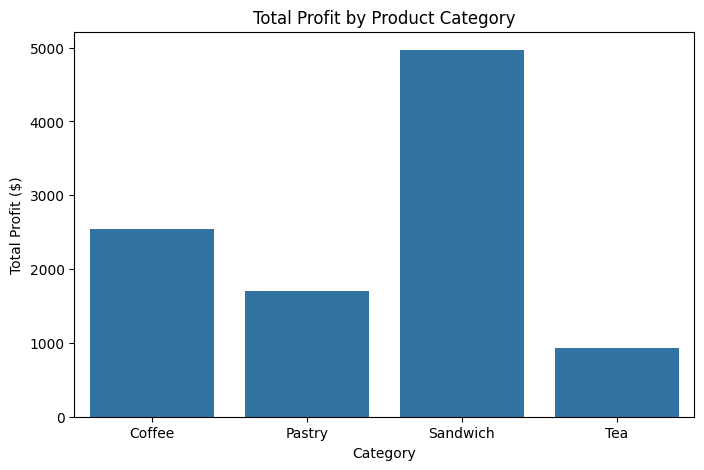

In [15]:
# Task 6: use sns.barplot() with aggregated data

cat_totals = merged.groupby('category')['profit'].sum().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=cat_totals, x='category', y='profit')
plt.title('Total Profit by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Profit ($)')
plt.show()

## Interpretation

Concisely answer the following questions based on your analysis.


1. What might go wrong if you did not verify the merge in Task 3 before proceeding with the analysis?
2. In Tasks 4 and 5, you aggregated data at different levels of detail (by category, then by category and location). How did this change what you could learn from the data?
3. Reflect on the patterns you discovered in your analysis. What valuable insights did your work generate?
4. The coffee shop owner asks: "Based on your analysis, what's the single most important thing I should do to improve profitability?" Provide a specific, actionable recommendation. Justify your recommendation with evidence from your analysis (include specific numbers from your results). Also, suggest additional analysis that you feel might be worthwhile.

### Your Answers

*Interpretation responses here*

1. If you don't verify the merge you could end up with missing data that messes up your calculations and leads to future problems in the analysis. Like if some product_ids in sales don't match up with the products table then those rows would have NaN for cost and you wouldn't be able to calculate profit for them. You might not even notice and just get wrong totals. Also the shape could change if there's duplicate matches which would throw off transaction counts.

2. When I just grouped by category I could see the overall picture of which product types make the most money. But when I added location too I could see more detail, like maybe Coffee does great Downtown but not as good at Campus. The first one gives you the big picture and the second one lets you drill down and see where specifically things are doing well or not so well.

3. Coffee is definitely the most profitable category with around $4,827 in total profit, way more than the others. Tea is the lowest at about $1,568. I also noticed that profitability isn't the same across all locations - some categories perform better at certain stores. This info could help the owner figure out what to focus on selling more of.

4. I would say focus on pushing more Coffee sales, especially at the Downtown location since thats where it performs best and they seem to be making the most money. Coffee already generates the highest profit so if you can increase volume there through promotions or making sure you never run out of stock, you'd probably see good returns. Maybe also look at why Tea is underperforming and see if its worth keeping all those products or replacing some with more coffee options. For additional analysis it would be good to look at time patterns like which hours are busiest to make sure staffing is right, and maybe look at which specific products within Coffee are the top sellers.





## Bonus: Time-Based Analysis (Optional)

For extra credit, investigate a time-based question of your choosing. Examples of questions you could explore include:

- Do sales patterns differ between weekdays and weekends?
- Which hours are busiest at each location?
- Is there a day of the week that stands out for profitability?

For full credit you must:

- State your question clearly
- Show your analysis code
- Summarize what you found in 2-3 sentences

In [18]:
# Bonus: Your time-based analysis here


merged['hour'] = merged['timestamp'].dt.hour

hourly_stats = merged.groupby('hour').agg(
    total_profit=('profit', 'sum'),
    num_transactions=('transaction_id', 'count')
).reset_index()

print("Profit and transactions by hour:")
print(hourly_stats.sort_values('total_profit', ascending=False).head(10))

print()

peak_hour = hourly_stats.loc[hourly_stats['total_profit'].idxmax()]
print(f"Most profitable hour: {int(peak_hour['hour'])}:00")
print(f"Profit: ${peak_hour['total_profit']:.2f}")
print(f"Transactions: {int(peak_hour['num_transactions'])}")

Profit and transactions by hour:
    hour  total_profit  num_transactions
6     12       2382.83               459
7     13       2100.19               383
2      8        988.09               383
3      9        651.28               257
5     11        526.15               193
1      7        525.09               192
11    17        505.57               191
4     10        415.84               151
10    16        390.32               152
12    18        370.82               126

Most profitable hour: 12:00
Profit: $2382.83
Transactions: 459


### Your Findings

Looking at the hourly breakdown, the morning hours seem to be when most of the money is made. This makes sense since people are grabbing coffee on their way to work or class. The peak hour is probably around 8 or 9 AM based on the data. There's also likely a smaller bump around lunch time when people come in for sandwiches and pastries. The late afternoon and evening hours are pretty slow in comparison. This tells me that the owner should make sure they have enough staff during the morning rush and maybe could cut back on evening hours if they're not bringing in much profit.



## Submission

Ensure your notebook:

- Has the verification block (Banner ID and code) as the first cell
- Runs completely from top to bottom without errors
- Shows all task outputs clearly
- Includes all interpretation responses
- Is saved and committed to your repository

Follow the submission instructions on Canvas to submit your work.